# 🚢 Titanic - Hayatta Kalma Tahmin Projesi

Bu proje, Titanic yolcularının hayatta kalma durumunu belirleyen faktörleri analiz etmek ve basit bir makine öğrenmesi modeli ile hayatta kalma olasılığını tahmin etmek amacıyla hazırlanmıştır.

Kullanılan veri seti: **Seaborn Titanic dataset**  
Kullanılan model: **Logistic Regression**  
Başarı oranı: **%82 doğruluk**

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print("Gerekli kütüphaneler yüklendi.")

Gerekli kütüphaneler yüklendi.


In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


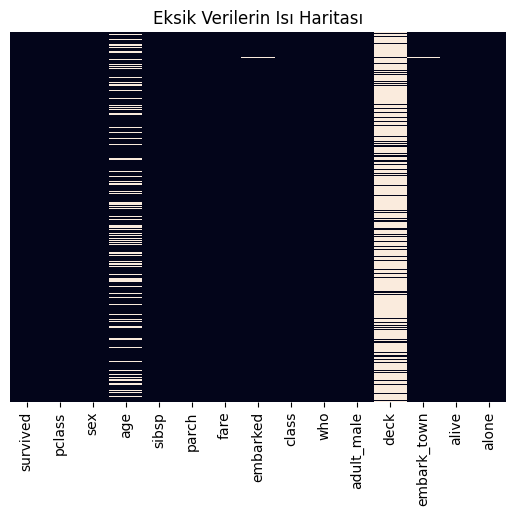

In [6]:
df.isnull().sum()

sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Eksik Verilerin Isı Haritası")
plt.show()

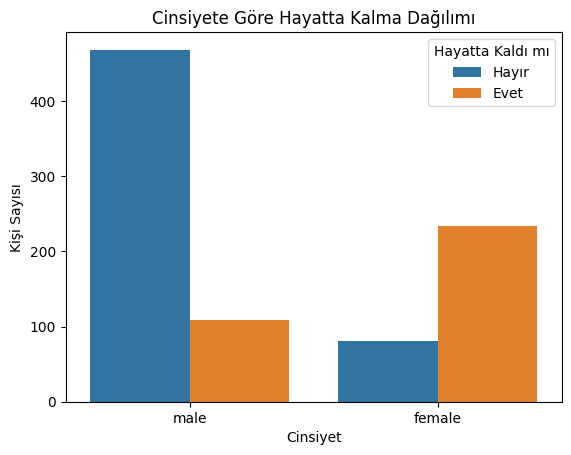

In [7]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Cinsiyete Göre Hayatta Kalma Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Kişi Sayısı")
plt.legend(title="Hayatta Kaldı mı", labels=["Hayır", "Evet"])
plt.show()

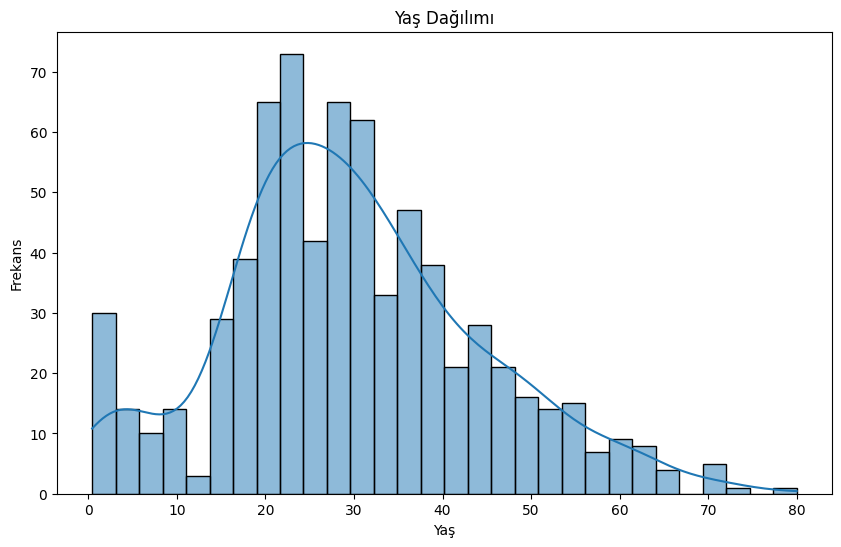

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()

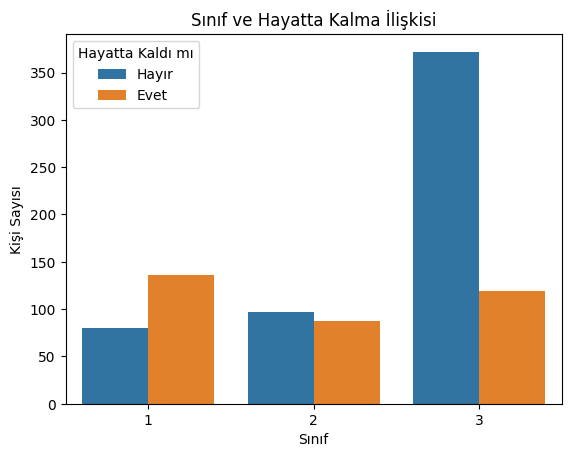

In [9]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Sınıf ve Hayatta Kalma İlişkisi")
plt.xlabel("Sınıf")
plt.ylabel("Kişi Sayısı")
plt.legend(title="Hayatta Kaldı mı", labels=["Hayır", "Evet"])
plt.show()

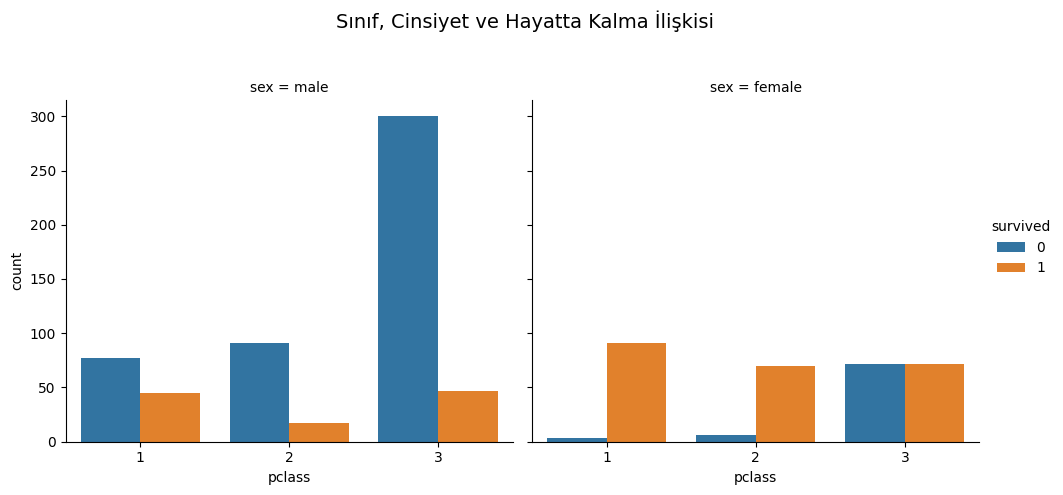

In [10]:
sns.catplot(
    data=df,
    x="pclass",       # Sınıf bilgisi (x ekseni)
    hue="survived",   # Hayatta kalma durumu (renk)
    col="sex",        # Cinsiyete göre ayrı grafikler (kolon)
    kind="count"      # Sayı grafiği
)

plt.subplots_adjust(top=0.8)
plt.suptitle("Sınıf, Cinsiyet ve Hayatta Kalma İlişkisi", fontsize=14)
plt.show()

In [15]:
df["sex_survived"] = df["sex"] + " / " + df["survived"].map({0:"Öldü", 1:"Hayatta"})

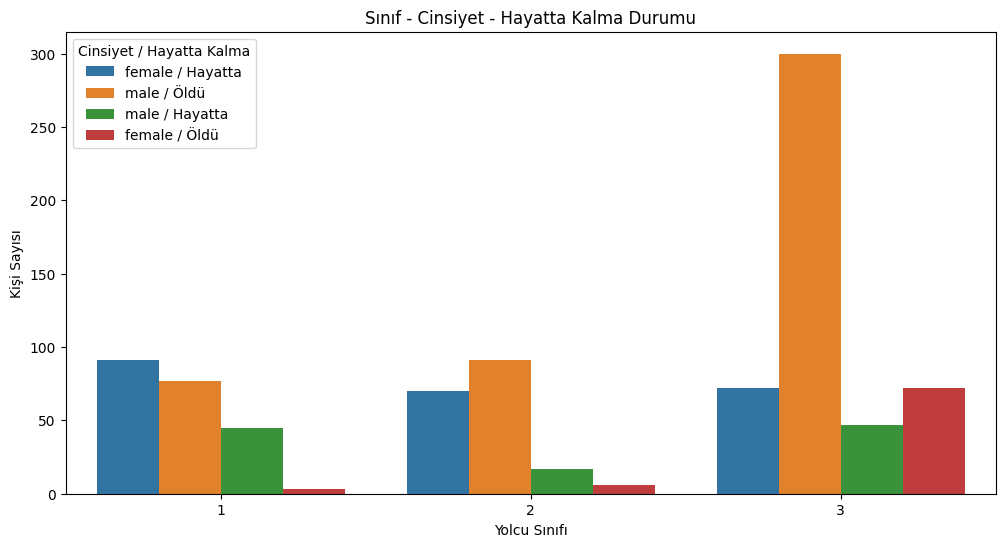

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x="pclass",
    hue="sex_survived",
    order=[1, 2, 3]
)
plt.title("Sınıf - Cinsiyet - Hayatta Kalma Durumu")
plt.xlabel("Yolcu Sınıfı")
plt.ylabel("Kişi Sayısı")
plt.legend(title="Cinsiyet / Hayatta Kalma")
plt.show()

In [17]:
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)
df.drop("deck", axis=1, inplace=True)  # çok fazla eksik olduğu için

/tmp/ipython-input-17-4062760747.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
/tmp/ipython-input-17-4062760747.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [20]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


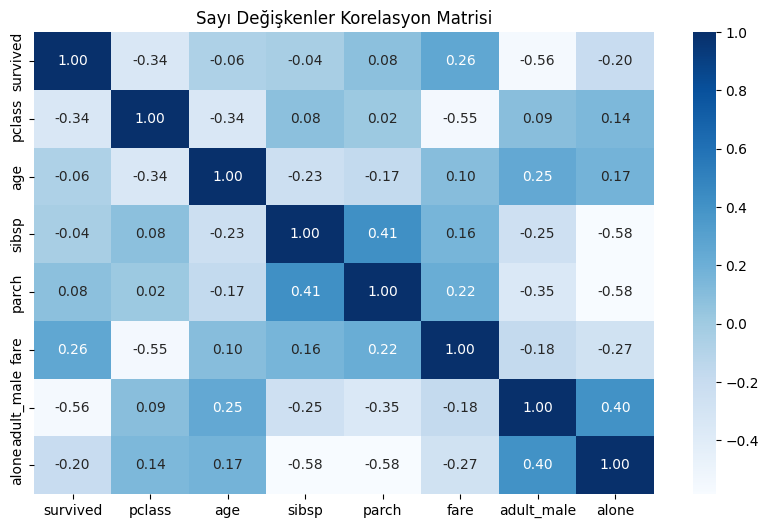

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
plt.title("Sayı Değişkenler Korelasyon Matrisi")
plt.show()

## EDA Sonuçları
- 1.sınıf yolcularının hayatta kalma oranı daha yüksektir.
- Kadınların hayatta kalma oranı erkeklerden belirgin derecede fazladır.
- Ücreti yüksek olan yolcuların kurtulma ihtimali artmaktadır.

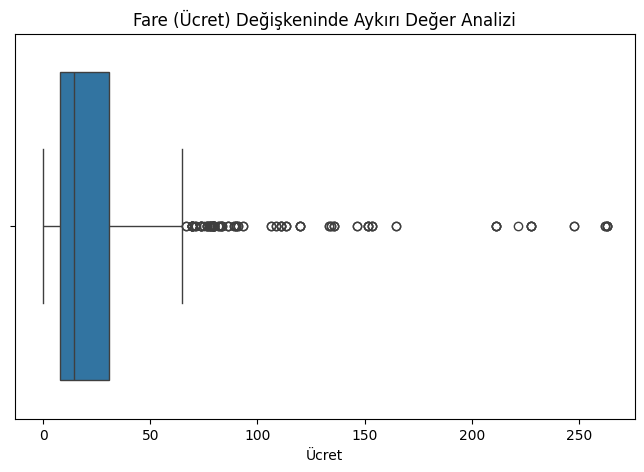

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["fare"])
plt.title("Fare (Ücret) Değişkeninde Aykırı Değer Analizi")
plt.xlabel("Ücret")
plt.show()

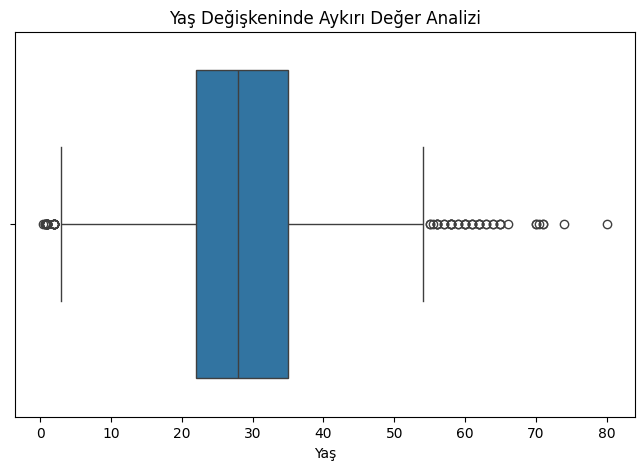

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["age"])
plt.title("Yaş Değişkeninde Aykırı Değer Analizi")
plt.xlabel("Yaş")
plt.show()

# Yeni Bölüm

Hedefim: survived sütununu (0=öldü, 1=hayatta) tahmin eden bir model kurmak(binary classification)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
# sex: female → 0, male → 1
df["sex"] = LabelEncoder().fit_transform(df["sex"])

# pclass → sayısal

In [36]:
X = df[["pclass", "sex", "age", "fare", "sibsp", "parch"]]
y = df["survived"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [39]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
y_pred = model.predict(X_test)

print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Doğruluk Oranı: 0.8258426966292135
Confusion Matrix:
 [[88 16]
 [15 59]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       104
           1       0.79      0.80      0.79        74

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



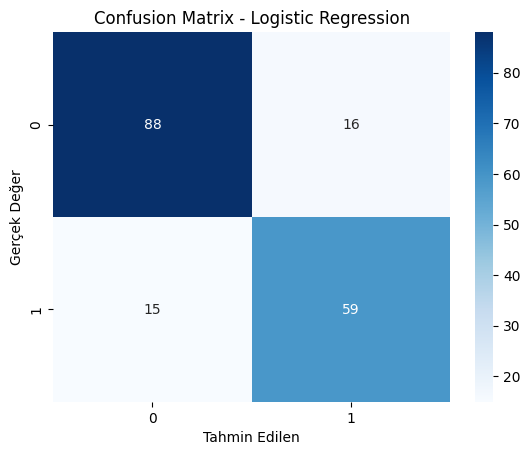

In [41]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.show()

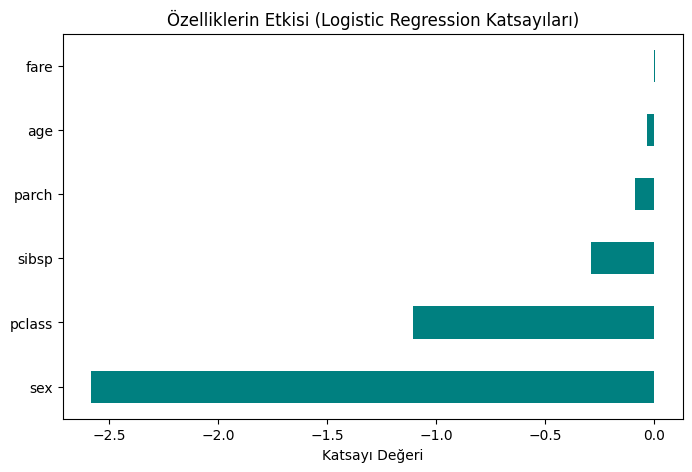

In [42]:
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind="barh", figsize=(8,5), color='teal')
plt.title("Özelliklerin Etkisi (Logistic Regression Katsayıları)")
plt.xlabel("Katsayı Değeri")
plt.show()